# Feature selection

Unlike data reduction methods, which actually calculate smaller number of new feature from existing features, feature selection methods omit features that seem of little importance to the task.

## Random selection and random forests

The simplest method is random selection. This may look of little use on its own, but some advanced machine learning methods use it as a part of them - for example, random forests. In random forests, a random subset of all features is always selected and a classification (or regression) tree is built on top of it. In this way, a large number of trees are created and they vote on the final classification. Interestingly, tree algorithms can often also calculate the importance of individual attributes. In the case of scikit-learn and random forests, the so-called Gini importance is calculated. Let's try to plot it again on our smaller data (the same as in the previous text).

Accuracy:  0.5866666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.55      0.85      0.67        20
           2       1.00      0.31      0.47        26
           3       0.54      1.00      0.70        55
           4       1.00      0.12      0.21        17
           5       0.67      0.40      0.50         5
           6       1.00      0.24      0.38        17

    accuracy                           0.59       150
   macro avg       0.68      0.42      0.42       150
weighted avg       0.69      0.59      0.51       150



C:\Users\Martin\anaconda3\envs\acim\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Martin\anaconda3\envs\acim\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Martin\anaconda3\envs\acim\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


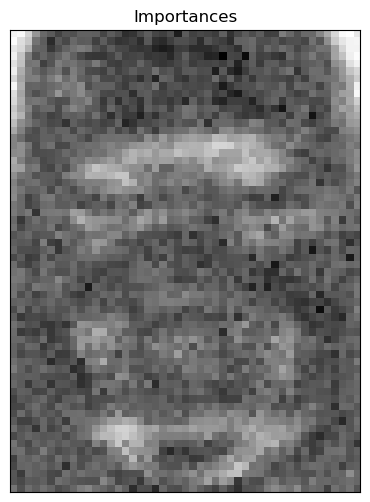

In [3]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

from sklearn import datasets
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

def plot_img(ax, img, title=''):    # simple function to plot an image
    ax.imshow(img, cmap=plt.cm.gray)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title(title)

data = datasets.fetch_lfw_people(min_faces_per_person=70)

train_x, test_x, train_y, test_y = model_selection.train_test_split(data.data, data.target, test_size=150)

clf = ensemble.RandomForestClassifier(n_estimators=500)
clf.fit(train_x, train_y)
clf_y = clf.predict(test_x)

print('Accuracy: ', metrics.accuracy_score(test_y, clf_y))
print(metrics.classification_report(test_y, clf_y))

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(5,6))
ax = plt.subplot(111)
plot_img(ax, np.log(clf.feature_importances_.reshape((62,47))), title='Importances')

## Variance-based Selection

Another very simple criterion for feature selection is their variance. Features with very little or even zero variance are likely to have little effect on the target class/value. Calculating variance is easy.

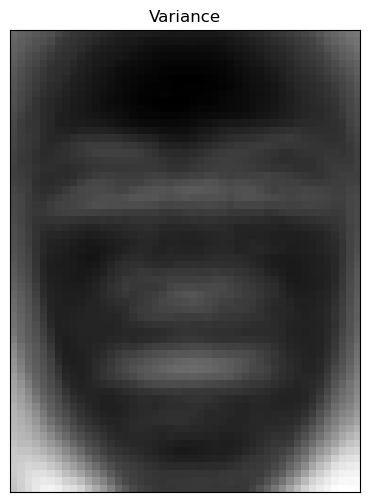

In [4]:
import numpy as np

img = np.std(data.data, axis=0)

fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
plot_img(ax, img.reshape((62, 47)), 'Variance')

## Statistic-based Selection

We can also select features based on statistical tests of dependence of the target class on the given attribute. For classification we can use the ANOVA test, or the $\chi^2$ test.

[131.8711113  135.52991523 117.61238654  79.41234218  45.00905979
  25.02065168  16.61684184  14.98791221  16.37962949  17.09547751]


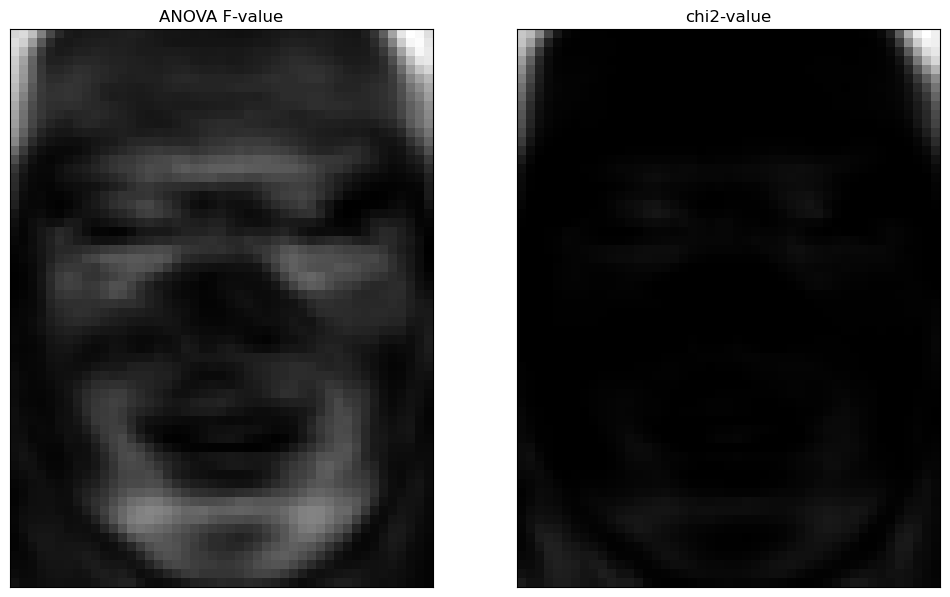

In [5]:
from sklearn import feature_selection

kbest = feature_selection.SelectKBest()
kbest.fit(data.data, data.target)

img = -np.log(kbest.pvalues_)
img[img==np.inf] = max(img[img!=np.inf])  # fix infinities from log 0

print(img[:10])

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(121)
plot_img(ax, img.reshape((62, 47)), 'ANOVA F-value')

kbest = feature_selection.SelectKBest(feature_selection.chi2)
kbest.fit(data.data, data.target)

img = -np.log(kbest.pvalues_)
img[img==np.inf] = max(img[img!=np.inf])  # fix infinities from log 0

ax = fig.add_subplot(122)
plot_img(ax, img.reshape((62, 47)), 'chi2-value')

## Other feature selection methods

Of course, the list above is not complete, there are also methods for feature selection based on the gradual elimination of the least important feature, depending on how a model evaluates them. Feature selection can also be formulated as an optimization problem, where the space of all subsets of a set of features is searched and the performance of the learned model is optimized. In this case, any optimization technique can be used, from simple random search, through simulated annealing to evolutionary algorithms. However, it should be noted that many machine learning methods are stochastic, so even with the same set of features in the beginning, they can give different results. It is necessary to use crossvalidation and pay attention to the selection of the final set of feaures, also taking into account the variance of the results and possibility of overfitting (it is even possible to overfit to the specific distribution of test and training sets in crossvalidation).